### Data Analysis of spectral dataset of corn samples

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import ipywidgets as widgets
from IPython.display import display

In [ ]:
df = pd.read_csv('../data/MLE-Assignment.csv')
print("Data Shape", df.shape)
print("Data description", df.describe())

Data Shape (500, 450)
Data description                 0           1           2           3           4           5  \
count  500.000000  500.000000  500.000000  500.000000  500.000000  500.000000   
mean     0.443118    0.440761    0.433814    0.426122    0.418990    0.412432   
std      0.044719    0.045520    0.045764    0.046070    0.045405    0.044727   
min      0.311182    0.295321    0.284064    0.282054    0.296702    0.286860   
25%      0.410456    0.404310    0.397038    0.389029    0.382102    0.377157   
50%      0.449105    0.442651    0.434215    0.425074    0.417075    0.411872   
75%      0.480245    0.478822    0.473158    0.464947    0.459232    0.452198   
max      0.556287    0.530168    0.528774    0.533202    0.511909    0.501786   

                6           7           8           9  ...         439  \
count  500.000000  500.000000  500.000000  500.000000  ...  500.000000   
mean     0.405868    0.399815    0.394038    0.389664  ...    0.741255   
std      

In [ ]:
print("Data Shape", df.shape)
print("Data description", df.describe())

Data Shape (500, 450)
Data description                 0           1           2           3           4           5  \
count  500.000000  500.000000  500.000000  500.000000  500.000000  500.000000   
mean     0.443118    0.440761    0.433814    0.426122    0.418990    0.412432   
std      0.044719    0.045520    0.045764    0.046070    0.045405    0.044727   
min      0.311182    0.295321    0.284064    0.282054    0.296702    0.286860   
25%      0.410456    0.404310    0.397038    0.389029    0.382102    0.377157   
50%      0.449105    0.442651    0.434215    0.425074    0.417075    0.411872   
75%      0.480245    0.478822    0.473158    0.464947    0.459232    0.452198   
max      0.556287    0.530168    0.528774    0.533202    0.511909    0.501786   

                6           7           8           9  ...         439  \
count  500.000000  500.000000  500.000000  500.000000  ...  500.000000   
mean     0.405868    0.399815    0.394038    0.389664  ...    0.741255   
std      

In [18]:
#Going through dataset
print("Column names",df.columns.tolist())
print("Number of features",(df.iloc[:,1:-1]).shape[1]) #First column is index and last column is target, hence excluding them
print("Number of samples",len(df))

Column names ['hsi_id', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '

#### Dataframe description
We have a dataframe that contains 500 corn samples in the form of rows and 450 columns that are:
1. hsi_id : Identification of corn sample
2. 0-447 : Features that determine reflectance values of the respective corn sample for each wavelength
3. vomitoxin_ppb : Target variable that determines the DON metric in each corn sample

In [19]:
# Checking for missing values
print([i for i in df.isnull() if i == True]) #If there are any missing values, it will print True

[]


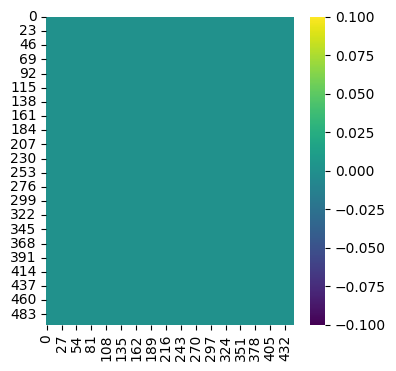

In [20]:
# Visualizing existence of missing values
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
sns.heatmap(df.iloc[:, 1:].isnull(), cmap="viridis")
plt.show()
#Since we see a blank plot, it means there are no missing values in the dataset

In [21]:
#Checking for zero values
zero_count = (df.iloc[:,1:-1] == 0).sum()
print([i for i in zero_count if i>0])

[]


#### Presence of Missing Values
Since the visualization is a monochrome and we see that dataframe has no null values, it does not have any missing values. Also, we see that there are no 0 values present in the reflectance values, which could act as a possible null case scenario.

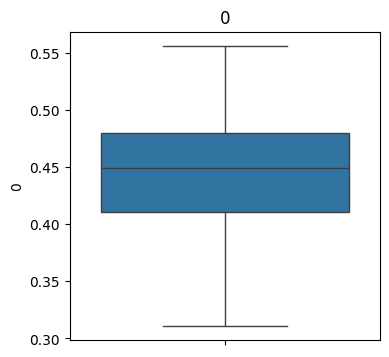

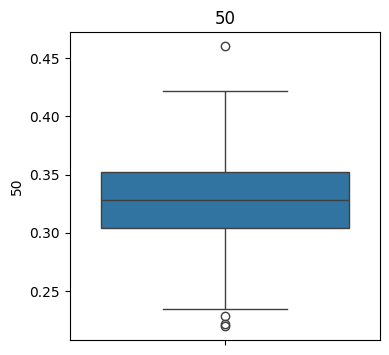

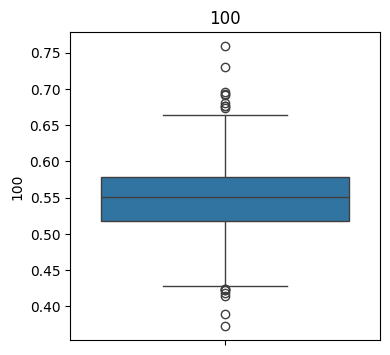

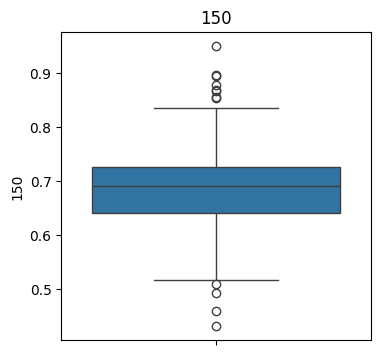

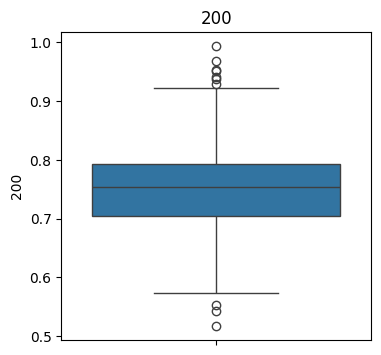

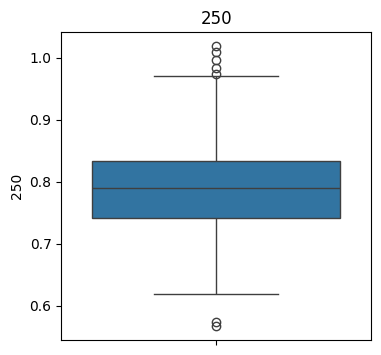

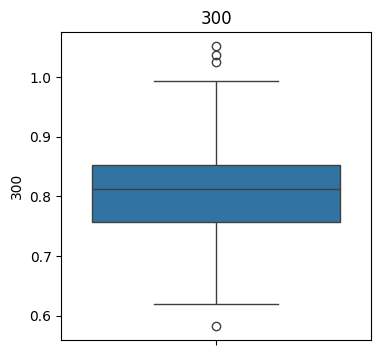

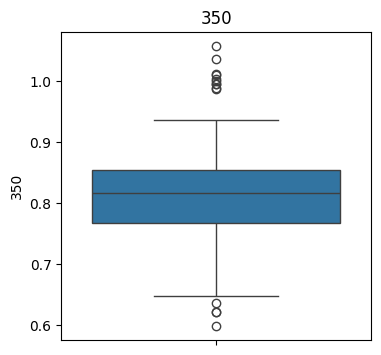

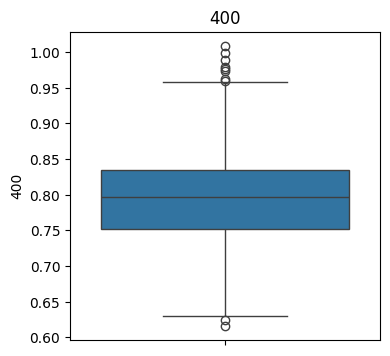

Outlier summary: {'0': 0, '1': 0, '2': 0, '3': 0, '4': 0, '5': 0, '6': 0, '7': 0, '8': 0, '9': 0, '10': 0, '11': 0, '12': 0, '13': 0, '14': 0, '15': 2, '16': 0, '17': 2, '18': 0, '19': 2, '20': 1, '21': 1, '22': 0, '23': 1, '24': 2, '25': 1, '26': 0, '27': 1, '28': 2, '29': 0, '30': 1, '31': 1, '32': 2, '33': 1, '34': 4, '35': 4, '36': 3, '37': 3, '38': 4, '39': 5, '40': 2, '41': 5, '42': 6, '43': 6, '44': 4, '45': 4, '46': 4, '47': 6, '48': 4, '49': 7, '50': 4, '51': 4, '52': 3, '53': 3, '54': 3, '55': 4, '56': 1, '57': 3, '58': 3, '59': 5, '60': 3, '61': 8, '62': 6, '63': 5, '64': 5, '65': 4, '66': 2, '67': 4, '68': 4, '69': 3, '70': 5, '71': 2, '72': 2, '73': 5, '74': 3, '75': 4, '76': 9, '77': 4, '78': 2, '79': 6, '80': 4, '81': 4, '82': 4, '83': 6, '84': 7, '85': 8, '86': 5, '87': 9, '88': 5, '89': 8, '90': 12, '91': 8, '92': 10, '93': 6, '94': 11, '95': 10, '96': 10, '97': 16, '98': 9, '99': 12, '100': 17, '101': 12, '102': 12, '103': 11, '104': 14, '105': 13, '106': 12, '107': 1

In [36]:
def analyze_outliers(df):
    outlier_summary = {}
    feature_indices_with_outliers = []

    # Get a list of feature indices (excluding the first and last columns)
    feature_indices = list(range(1, df.shape[1] - 1))

    # Visualizing every 50th sample 
    for feature in range(1, df.shape[1] - 1):
        if ( feature in range(1,500,50)):
            plt.figure(figsize=(4, 4))
            sns.boxplot(df.iloc[:, feature])
            plt.title(df.columns[feature])
            plt.show()
        
        # Calculate the number of outliers
        Q1 = df.iloc[:, feature].quantile(0.25)
        Q3 = df.iloc[:, feature].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df.iloc[:, feature] < (Q1 - 1.5 * IQR)) | (df.iloc[:, feature] > (Q3 + 1.5 * IQR))]
        outlier_summary[df.columns[feature]] = len(outliers)

        if len(outliers) > 0:
            feature_indices_with_outliers.append(feature)

    return outlier_summary, feature_indices_with_outliers

# Analyze outliers
outlier_summary, feature_indices_with_outliers = analyze_outliers(df)
print("Outlier summary:", outlier_summary)
print("Feature indices with outliers:", feature_indices_with_outliers)
print("Number of features with outliers:", len(feature_indices_with_outliers))

Choice of Method for Outlier detection: \
IQR used as it works well for small datasets. 
We see that 428 of the features have outliers.


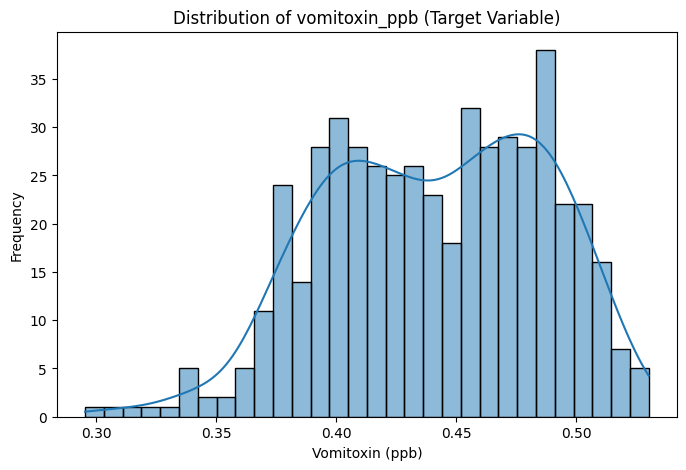

In [ ]:
# Understanding the distribution of the target variable
plt.figure(figsize=(8, 5))
sns.histplot(df.iloc[:,2], bins=30, kde=True)
plt.title("Distribution of vomitoxin_ppb (Target Variable)")
plt.xlabel("Vomitoxin (ppb)")
plt.ylabel("Frequency")
plt.show()

We see that the target variable follows a bimodal distribution. 

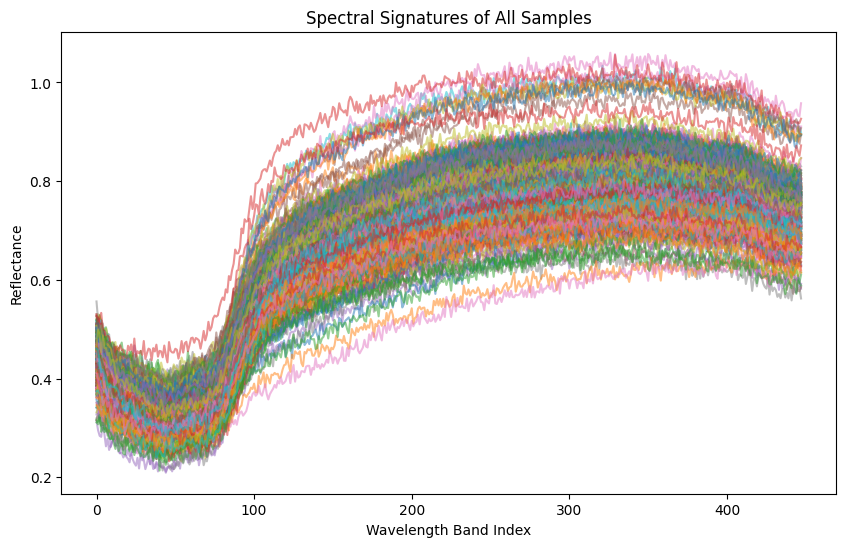

In [24]:

def plot_all_samples(X, title="Spectral Signatures of All Samples"):
    """
    Plots each row of X as a line, where:
      - X: 2D array or DataFrame of shape (n_samples, n_wavelengths)
    """
    plt.figure(figsize=(10, 6))
    for i in range(X.shape[0]):
        plt.plot(X[i, :], alpha=0.5)
    plt.xlabel("Wavelength Band Index")
    plt.ylabel("Reflectance")
    plt.title(title)
    plt.show()
plot_all_samples(df.iloc[:, 1:-1].values)

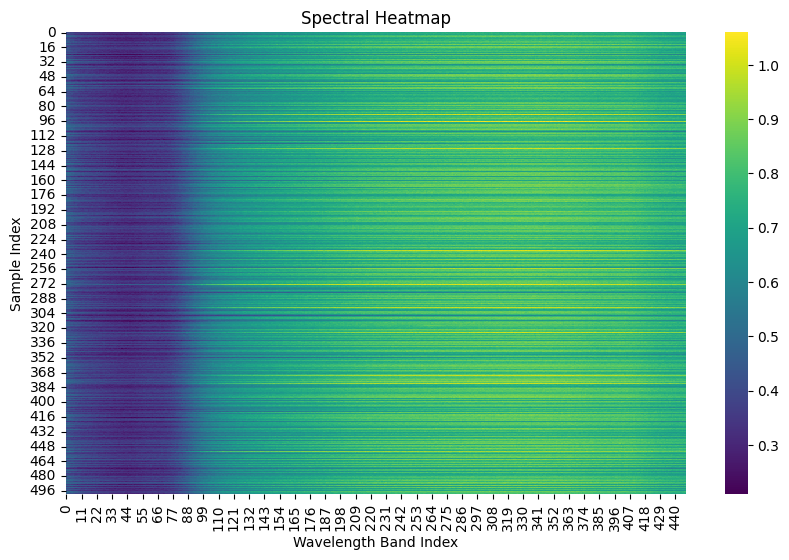

In [ ]:

def plot_spectral_heatmap(X, title="Spectral Heatmap"):
    """
    Plots a heatmap where each row is a sample and each column is a wavelength.
    The color scale indicates reflectance.
    """
    plt.figure(figsize=(10, 6))
    sns.heatmap(X, cmap="viridis")
    plt.title(title)
    plt.xlabel("Wavelength Band Index")
    plt.ylabel("Sample Index")
    plt.show()

plot_spectral_heatmap(df.iloc[:, 1:-1].values)

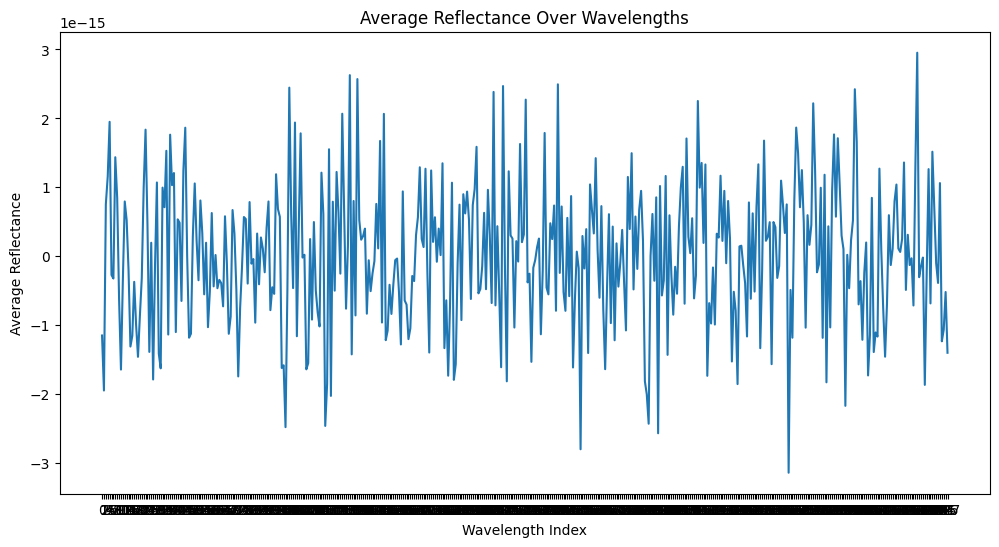

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

X = df.drop(["hsi_id","vomitoxin_ppb"], axis=1)
y = df["vomitoxin_ppb"].values.reshape(-1, 1)

# Normalize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert the scaled features back to a DataFrame for visualization
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Line plot for average reflectance over wavelengths
plt.figure(figsize=(12, 6))
plt.plot(X_scaled_df.mean(axis=0))
plt.title('Average Reflectance Over Wavelengths')
plt.xlabel('Wavelength Index')
plt.ylabel('Average Reflectance')
plt.show()



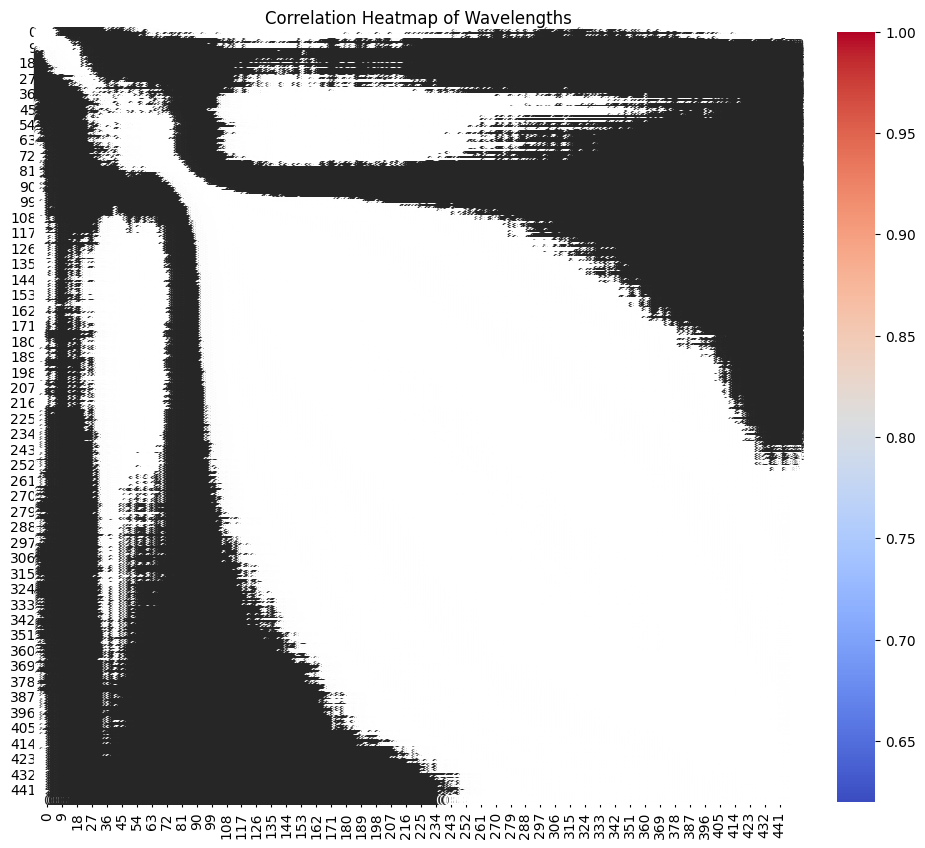

In [62]:
# Heatmap for correlation between wavelengths
plt.figure(figsize=(12, 10))
sns.heatmap(X_scaled_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap of Wavelengths')
plt.show()

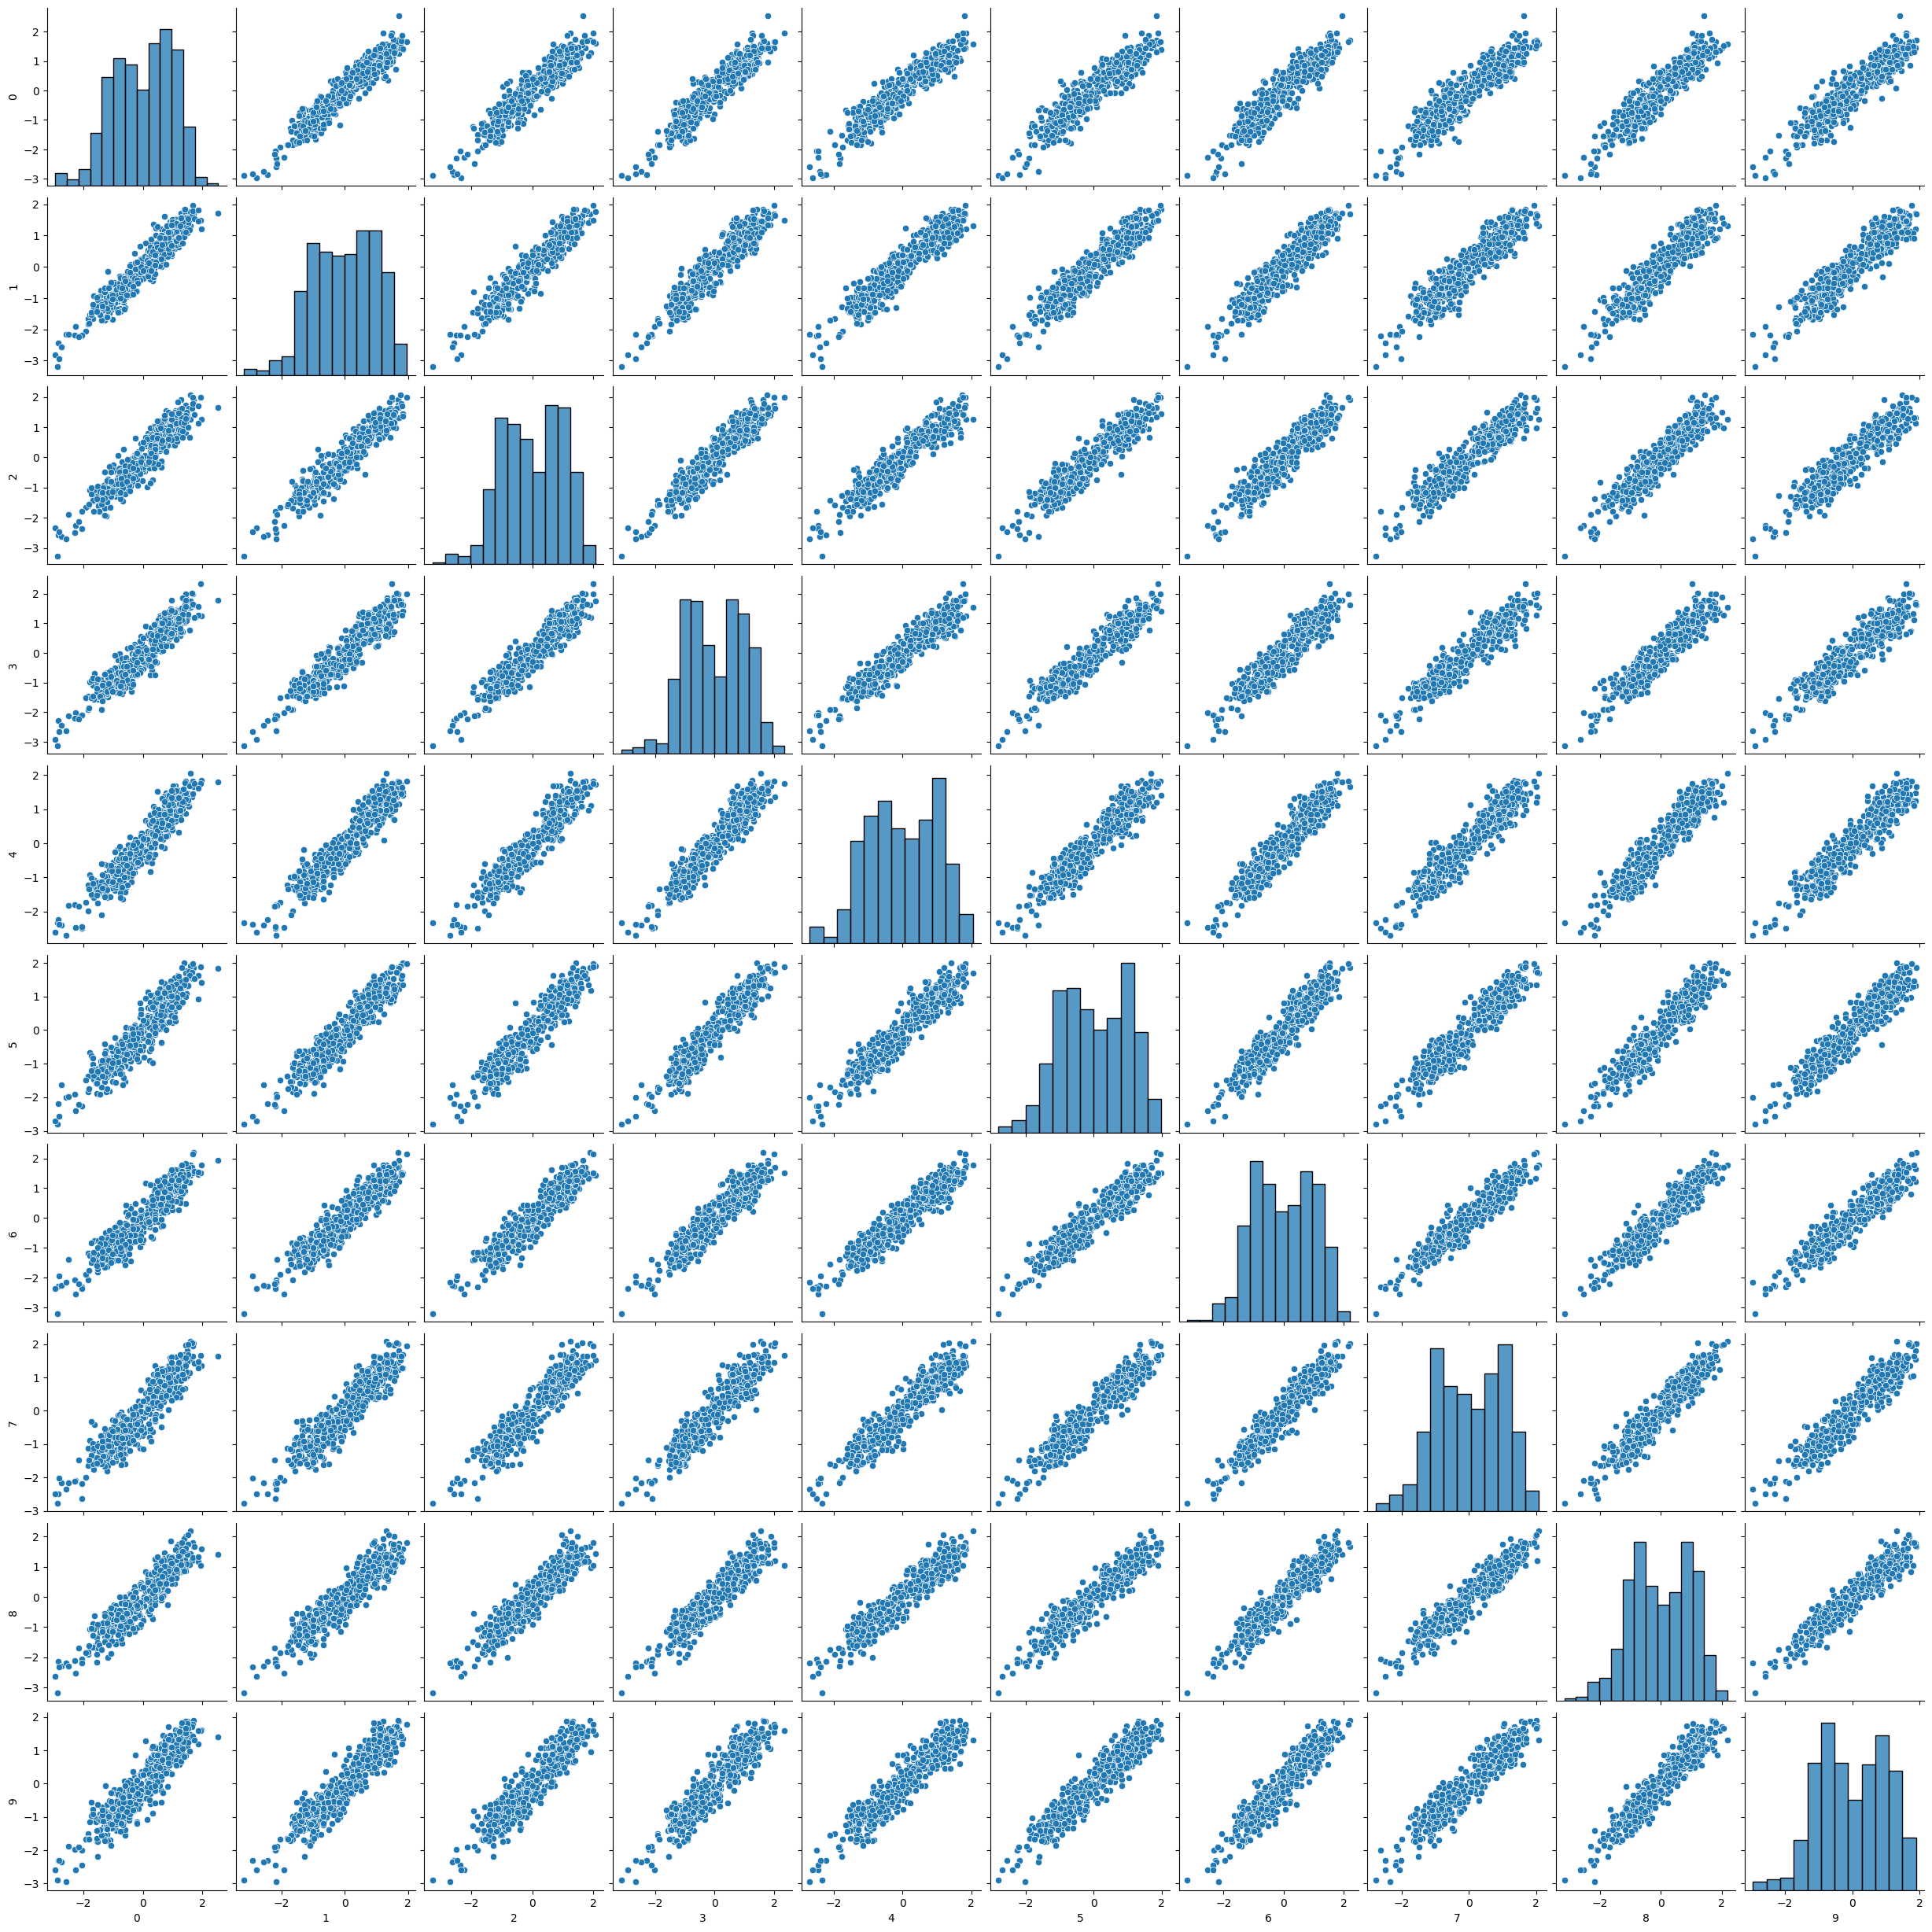

In [63]:
# Pairplot for sample comparisons
sns.pairplot(X_scaled_df.iloc[:, :10])  # Plotting only the first 10 wavelengths for readability
plt.show()

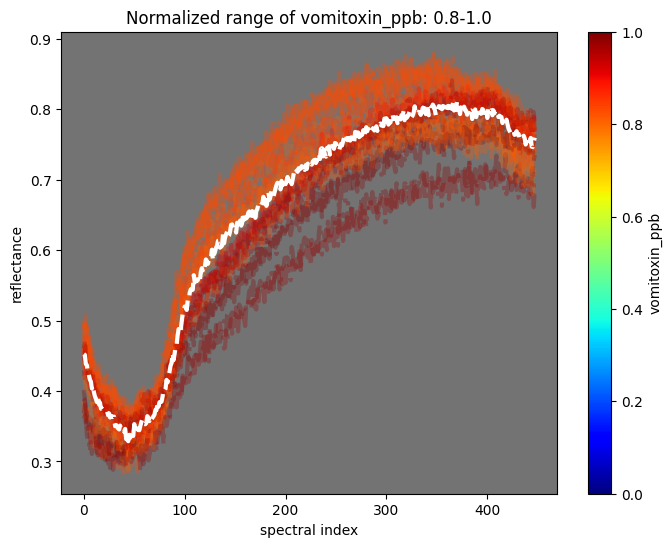

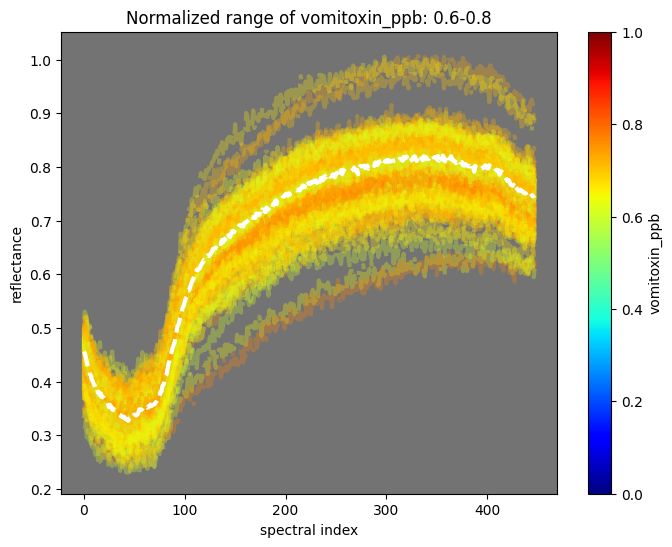

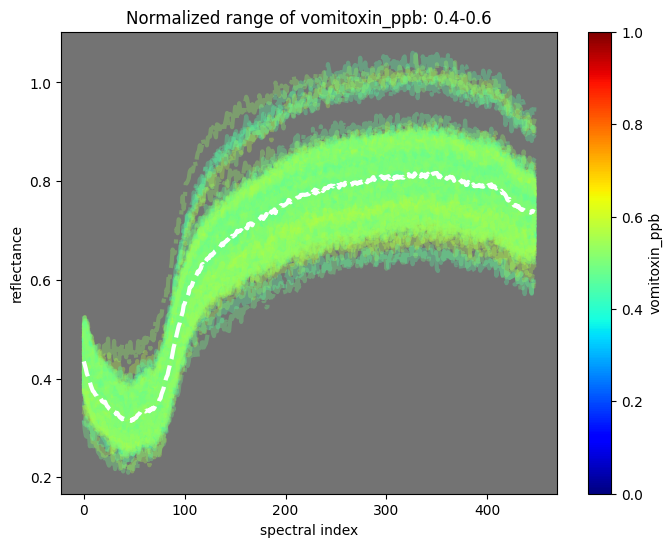

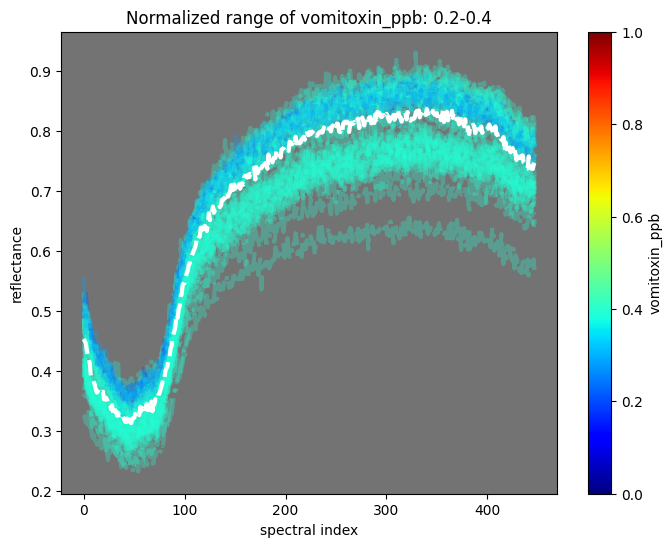

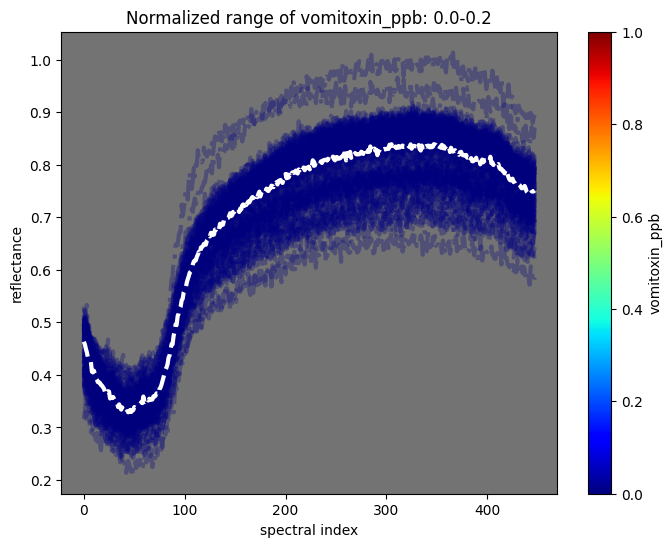

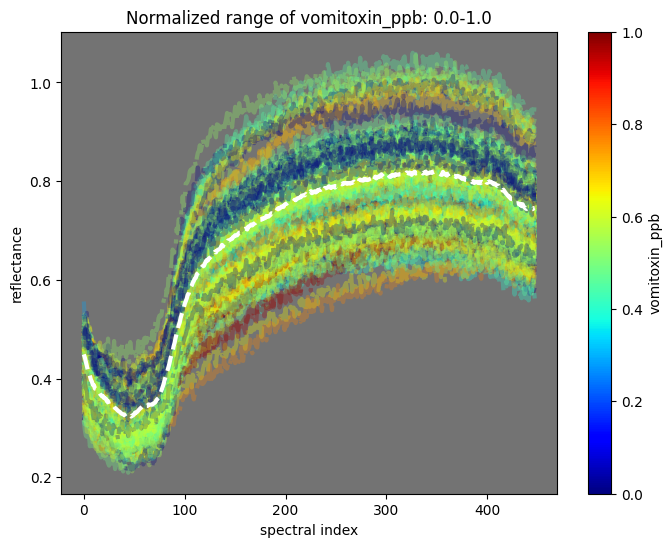

In [60]:
def plot_vomitoxin_curves(csv_file,
                          target_column='vomitoxin_ppb',
                          start_col=1,
                          end_col=449,
                          target_min=0.6,
                          target_max=0.8):
    """
    1. Reads a CSV file into a DataFrame.
    2. Log-transforms the target column by: log10(value - min(value) + 1).
    3. Min-max normalizes the target column to the [0,1] range.
    4. Plots selected rows, color-coded according to target values within
       a specified range, along with a median curve.
    """

    # Read the CSV file
    df = pd.read_csv(csv_file)

    # Log transform the target column
    df[target_column] = np.log10(df[target_column] - df[target_column].min() + 1)

    # Min-max normalize
    t_min, t_max = df[target_column].min(), df[target_column].max()
    df[target_column] = (df[target_column] - t_min) / (t_max - t_min)

    # Extract the target values and predictor values
    target = df[target_column]
    predictors = df.iloc[:, start_col:end_col].values

    # Create figure and axis
    fig, ax = plt.subplots(figsize=(8, 6))
    cmap = plt.get_cmap('jet', 256)  # Jet colormap with 256 discrete entries
    plot_alpha = 0.3

    curves_for_median = []

    # Loop over a subset of rows (up to 500)
    for i in range(min(500, len(df))):
        val = target.iloc[i]
        if target_min <= val <= target_max:
            xvals = predictors[i, :]
            curves_for_median.append(xvals)

            # Map target value to an index [0..255] for the colormap
            idx = int(round(val * 255))
            idx = max(0, min(255, idx))

            # Color from the colormap, adjusting alpha
            base_color = cmap(idx)
            color = (base_color[0], base_color[1], base_color[2], plot_alpha)

            # Plot each curve
            ax.plot(range(len(xvals)), xvals, '-.', color=color, linewidth=3)

    ax.set_title(f"Normalized range of {target_column}: {target_min}-{target_max}")

    # Calculate and plot the median curve
    if curves_for_median:
        median_curve = np.median(np.array(curves_for_median), axis=0)
        ax.plot(range(len(median_curve)), median_curve, '--',
                color='white', linewidth=3)

    # Customize plot appearance
    ax.set_facecolor((0.45, 0.45, 0.45))
    ax.set_xlabel('spectral index')
    ax.set_ylabel('reflectance')

    # Create a colorbar for the target values in [0,1]
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=1))
    sm.set_array([])
    cb = fig.colorbar(sm, ax=ax)
    cb.set_label(target_column)

    plt.show()

csv_file = 'MLE-Assignment.csv'
plot_vomitoxin_curves(csv_file,
                      target_column='vomitoxin_ppb',
                      start_col=1,
                      end_col=449,
                      target_min=0.8,
                      target_max=1.0)
plot_vomitoxin_curves(csv_file,
                      target_column='vomitoxin_ppb',
                      start_col=1,
                      end_col=449,
                      target_min=0.6,
                      target_max=0.8)

plot_vomitoxin_curves(csv_file,
                      target_column='vomitoxin_ppb',
                      start_col=1,
                      end_col=449,
                      target_min=0.4,
                      target_max=0.6)
plot_vomitoxin_curves(csv_file,
                      target_column='vomitoxin_ppb',
                      start_col=1,
                      end_col=449,
                      target_min=0.2,
                      target_max=0.4)
plot_vomitoxin_curves(csv_file,
                      target_column='vomitoxin_ppb',
                      start_col=1,
                      end_col=449,
                      target_min=0.0,
                      target_max=0.2)
plot_vomitoxin_curves(csv_file,
                      target_column='vomitoxin_ppb',
                      start_col=1,
                      end_col=449,
                      target_min=0.0,
                      target_max=1.0)

### Current Analysis and Conclusion
Once I saw that my machine learning models were not able to learn, I took a close look at the way spectral features of different corn samples are mapped to vomitoxin_ppb , I see that it is difficult to visually segregate and identify the mapping between different spectral features and the toxicity levels. So this would make it harder for the ML model too and we may need either more samples or different indicator derived from these features and try the ML model again for a better performance. Currently, looking into this.